# **Import Library**

In [ ]:
!pip install imbalanced-learn
!pip install tensorflow
!pip install scikit-learn
!pip show tensorflow

Name: tensorflow
Version: 2.17.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as Xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.metrics import f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.base import BaseEstimator, ClassifierMixin

# **Import Dataset**

In [ ]:
Alopecia_Dataset_3=pd.read_csv('/content/DataSet3.csv')

In [ ]:
Alopecia_Dataset_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hair_loss               400 non-null    object 
 1   stay_up_late            400 non-null    int64  
 2   pressure_level          400 non-null    object 
 3   coffee_consumed         400 non-null    int64  
 4   brain_working_duration  400 non-null    int64  
 5   school_assesssment      95 non-null     object 
 6   stress_level            400 non-null    object 
 7   shampoo_brand           400 non-null    object 
 8   swimming                400 non-null    object 
 9   hair_washing            400 non-null    object 
 10  hair_grease             396 non-null    float64
 11  dandruff                111 non-null    object 
 12  libido                  400 non-null    int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 40.8+ KB


# **Dataset Information**

In [ ]:
Alopecia_Dataset_3.shape

(400, 13)

In [ ]:
Alopecia_Dataset_3.isnull().sum()

,0
hair_loss,0
stay_up_late,0
pressure_level,0
coffee_consumed,0
brain_working_duration,0
school_assesssment,305
stress_level,0
shampoo_brand,0
swimming,0
hair_washing,0


# **Data Type**

In [ ]:
data_types = Alopecia_Dataset_3.dtypes
num_categorical = sum(data_types == 'object')
num_quantitative = sum(data_types != 'object')

print("Number of categorical features:", num_categorical)
print("Number of quantitative features:", num_quantitative)

Number of categorical features: 8
Number of quantitative features: 5


# **Correlation Matrix**

                        hair_loss  stay_up_late  pressure_level  \
hair_loss                1.000000     -0.084972        0.218707   
stay_up_late            -0.084972      1.000000        0.023562   
pressure_level           0.218707      0.023562        1.000000   
coffee_consumed          0.122731     -0.000040        0.049188   
brain_working_duration   0.101411     -0.136854        0.036612   
school_assesssment      -0.077098     -0.121901       -0.059635   
stress_level             0.098655     -0.108032       -0.222505   
shampoo_brand            0.025786     -0.112710       -0.044260   
swimming                -0.016409      0.088662       -0.076934   
hair_washing             0.104364     -0.047357       -0.071394   
hair_grease             -0.213423     -0.126268       -0.115785   
dandruff                -0.049173      0.026563        0.036654   
libido                  -0.120343      0.025432        0.128993   

                        coffee_consumed  brain_working_durati

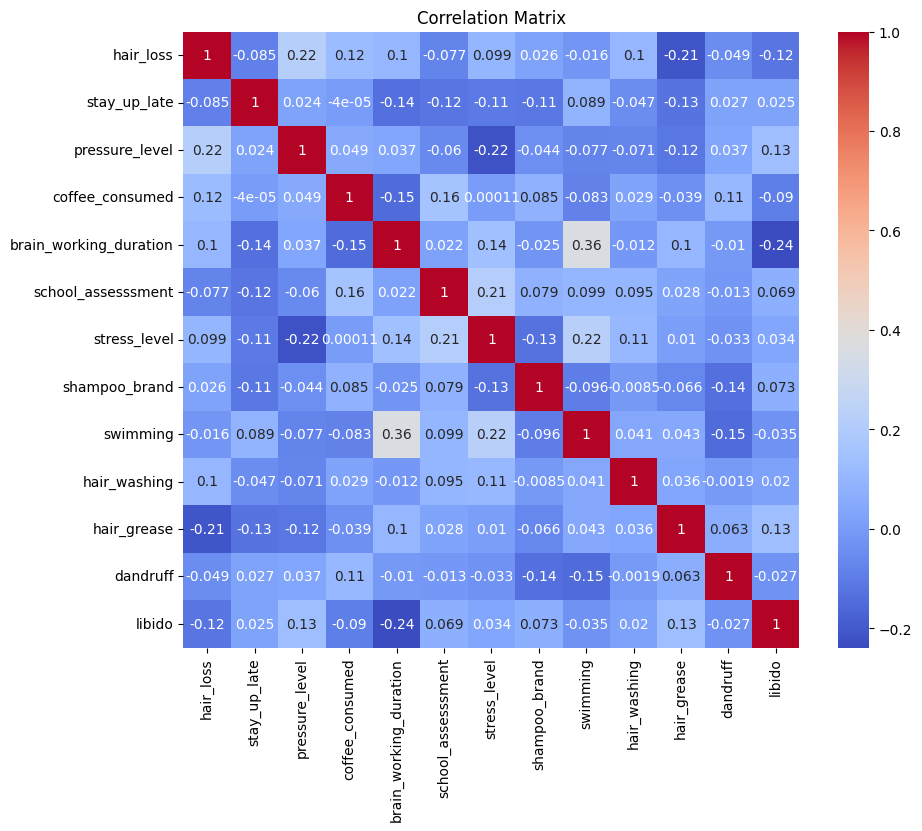

In [ ]:
np.random.seed(0)
data = np.random.rand(100, 13)
df = pd.DataFrame(data, columns=['hair_loss', 'stay_up_late', 'pressure_level', 'coffee_consumed', 'brain_working_duration','school_assesssment','stress_level','shampoo_brand','swimming','hair_washing','hair_grease','dandruff','libido'])

# Calculate the correlation matrix
corr_matrix = df.corr()

# Print the correlation matrix
print(corr_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# **Drop Columns**

In [ ]:
Alopecia_Dataset_3.drop(columns=['libido','swimming','stay_up_late'], axis=1, inplace=True)

In [ ]:
Alopecia_Dataset_3.tail()

,hair_loss,pressure_level,coffee_consumed,brain_working_duration,school_assesssment,stress_level,shampoo_brand,hair_washing,hair_grease,dandruff
395,Medium,Low,1,2,NaN,Low,Hair & Shoulder,N,1.0,NaN
396,Few,Low,0,3,NaN,Low,Hair & Shoulder,Y,2.0,NaN
397,Medium,Low,1,1,NaN,Low,Hair & Shoulder,N,2.0,NaN
398,Medium,Low,1,1,NaN,Low,Hair & Shoulder,N,2.0,NaN
399,Few,Low,0,2,NaN,Low,Hair & Shoulder,Y,2.0,NaN


# **Imputing**

In [ ]:
# Get the mode of both columns
mode_values = Alopecia_Dataset_3[["school_assesssment", "dandruff"]].mode()

# Fill missing values with the mode for each column
Alopecia_Dataset_3["school_assesssment"].fillna(mode_values["school_assesssment"][0], inplace=True)
Alopecia_Dataset_3["dandruff"].fillna(mode_values["dandruff"][0], inplace=True)


<ipython-input-123-26a886355595>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Alopecia_Dataset_3["school_assesssment"].fillna(mode_values["school_assesssment"][0], inplace=True)
<ipython-input-123-26a886355595>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

In [ ]:
Alopecia_Dataset_3.head()

,hair_loss,pressure_level,coffee_consumed,brain_working_duration,school_assesssment,stress_level,shampoo_brand,hair_washing,hair_grease,dandruff
0,Few,Low,0,1,Team ass,Low,Pantene,Y,3.0,Few
1,Few,Low,0,3,Team ass,Low,Pantene,N,1.0,Few
2,Medium,Low,1,0,Team ass,Low,Pantene,Y,2.0,Few
3,Few,Low,0,1,Team ass,Low,Pantene,N,3.0,Few
4,Few,Low,0,1,Team ass,Low,Pantene,Y,1.0,Few


In [ ]:
Alopecia_Dataset_3['school_assesssment'].value_counts()


,count
school_assesssment,
Team ass,344
Individual ass,24
Final exam revision,24
Final exam,8


In [ ]:
Alopecia_Dataset_3['dandruff'].value_counts()

,count
dandruff,
Few,365
Many,35


In [ ]:
Alopecia_Dataset_3['stress_level'].value_counts()

,count
stress_level,
Low,261
Medium,56
High,45
Very High,38


# **Encoding**

In [ ]:
Alopecia_Dataset_3.replace({
    "hair_loss": {"Few": 0, "Medium": 1, "Many": 2, "A lot": 3},
    "pressure_level": {"Low": 0, "Medium": 1, "High": 2,"Very High":3},
    "school_assesssment":{"Team ass":0,"Final exam revision":1,"Individual ass":2,"Final exam":3},
    "stress_level": {"Low": 0, "Medium": 1, "High": 2, "Very High":3 },
    "shampoo_brand": {"Pantene": 0, "Hair & Shoulder": 1},
    "hair_washing": {"Y": 0, "N": 1},
    "dandruff": {"Few": 1, "Many": 2}
}, inplace=True)


<ipython-input-128-62179cc9a72c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Alopecia_Dataset_3.replace({


In [ ]:
Alopecia_Dataset_3['dandruff'].value_counts()

,count
dandruff,
1,365
2,35


In [ ]:
Alopecia_Dataset_3.head()

,hair_loss,pressure_level,coffee_consumed,brain_working_duration,school_assesssment,stress_level,shampoo_brand,hair_washing,hair_grease,dandruff
0,0,0,0,1,0,0,0,0,3.0,1
1,0,0,0,3,0,0,0,1,1.0,1
2,1,0,1,0,0,0,0,0,2.0,1
3,0,0,0,1,0,0,0,1,3.0,1
4,0,0,0,1,0,0,0,0,1.0,1


In [ ]:
Alopecia_Dataset_3.tail()

,hair_loss,pressure_level,coffee_consumed,brain_working_duration,school_assesssment,stress_level,shampoo_brand,hair_washing,hair_grease,dandruff
395,1,0,1,2,0,0,1,1,1.0,1
396,0,0,0,3,0,0,1,0,2.0,1
397,1,0,1,1,0,0,1,1,2.0,1
398,1,0,1,1,0,0,1,1,2.0,1
399,0,0,0,2,0,0,1,0,2.0,1


In [ ]:
X,Y= make_classification(n_samples=1000, n_features=12, n_informative=6, n_redundant=6,
                           n_clusters_per_class=1, weights=[0.9, 0.1], flip_y=0, random_state=42)


# **Data Splitting**

In [ ]:
# Selecting the appropriate columns from your dataset
X = Alopecia_Dataset_3[["pressure_level", "coffee_consumed", "brain_working_duration", "school_assesssment", "stress_level", "shampoo_brand", "hair_washing", "hair_grease", "dandruff"]]
Y = Alopecia_Dataset_3["hair_loss"]

# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets (using the correct variables)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)


In [ ]:
print(X, Y)


     pressure_level  coffee_consumed  brain_working_duration  \
0                 0                0                       1   
1                 0                0                       3   
2                 0                1                       0   
3                 0                0                       1   
4                 0                0                       1   
..              ...              ...                     ...   
395               0                1                       2   
396               0                0                       3   
397               0                1                       1   
398               0                1                       1   
399               0                0                       2   

     school_assesssment  stress_level  shampoo_brand  hair_washing  \
0                     0             0              0             0   
1                     0             0              0             1   
2                    

In [ ]:
import numpy as np
import pandas as pd

# Desired dataset size
target_size = 8000
current_size = X.shape[0]
augmentation_factor = target_size // current_size  # Calculate how many times we need to augment

# Step 1: Identify and separate numeric columns from categorical columns
numeric_cols = X.select_dtypes(include=[np.number]).columns  # Select only numeric columns
categorical_cols = X.select_dtypes(exclude=[np.number]).columns  # Select non-numeric columns (if any)

# Step 2: Initialize empty lists to store augmented data
numeric_data_list = []
categorical_data_list = []

# Step 3: Apply noise injection and duplicate categorical data
for i in range(augmentation_factor):
    # Apply noise injection (jittering) to augment numeric data
    noise = np.random.normal(0, 0.01, X[numeric_cols].shape)  # Mean = 0, Std Dev = 0.01
    X_numeric_augmented = X[numeric_cols] + noise  # Augmented version of numeric columns
    numeric_data_list.append(X_numeric_augmented)  # Store augmented numeric data

    # Duplicate categorical data
    X_categorical_augmented = X[categorical_cols]  # No change for categorical columns
    categorical_data_list.append(X_categorical_augmented)  # Store categorical data

# Concatenate the augmented numeric data and categorical data
X_numeric_combined = pd.concat(numeric_data_list, axis=0).reset_index(drop=True)
X_categorical_combined = pd.concat(categorical_data_list, axis=0).reset_index(drop=True)

# Step 4: Combine both numeric and categorical columns into a full dataset
X_combined = pd.concat([X_numeric_combined, X_categorical_combined], axis=1)

# Step 5: Duplicate the target labels (Y) to match the new dataset size
Y_combined = pd.concat([pd.Series(Y)] * augmentation_factor, axis=0).reset_index(drop=True)

# If the dataset size is still less than 8000 due to rounding, add more samples
n_remaining = target_size - len(X_combined)
if n_remaining > 0:
    X_remaining_numeric = X[numeric_cols].sample(n_remaining, replace=True).reset_index(drop=True)
    X_remaining_categorical = X[categorical_cols].sample(n_remaining, replace=True).reset_index(drop=True)
    X_remaining_combined = pd.concat([X_remaining_numeric, X_remaining_categorical], axis=1)

    X_combined = pd.concat([X_combined, X_remaining_combined], axis=0).reset_index(drop=True)
    Y_remaining = pd.Series(Y).sample(n_remaining, replace=True).reset_index(drop=True)
    Y_combined = pd.concat([Y_combined, Y_remaining], axis=0).reset_index(drop=True)

# Step 6: Check the new dataset size
print(f"Original dataset size: {current_size}")
print(f"Augmented dataset size: {X_combined.shape[0]}")  # Should be 8000 now

# Step 7: Create the final augmented dataset
augmented_dataset = pd.DataFrame(X_combined)
augmented_dataset['hair_loss'] = Y_combined  # Add the target column

# Check the shape of the augmented dataset
print(f"Final augmented dataset shape: {augmented_dataset.shape}")  # Should output (8000, num_features + 1)

# Display the first few rows of the augmented dataset
print(augmented_dataset.head())

# Get summary statistics of the augmented dataset
print(augmented_dataset.describe())


Original dataset size: 400
Augmented dataset size: 8000
Final augmented dataset shape: (8000, 10)
   pressure_level  coffee_consumed  brain_working_duration  \
0        0.000919        -0.014946                0.983576   
1       -0.004967         0.004552                3.013969   
2       -0.012855         0.990682               -0.007607   
3       -0.010177        -0.015743                0.983646   
4       -0.011323        -0.000904                0.994121   

   school_assesssment  stress_level  shampoo_brand  hair_washing  hair_grease  \
0           -0.003925      0.009381      -0.007755      0.014306     2.994027   
1            0.009603      0.016695      -0.007251      0.988643     0.987669   
2            0.032205      0.002209      -0.000629     -0.006299     1.989268   
3            0.017043     -0.006618      -0.016599      0.996666     3.006778   
4            0.010276      0.014622       0.002452     -0.018569     0.997925   

   dandruff  hair_loss  
0  1.004154      

In [ ]:
augmented_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pressure_level          8000 non-null   float64
 1   coffee_consumed         8000 non-null   float64
 2   brain_working_duration  8000 non-null   float64
 3   school_assesssment      8000 non-null   float64
 4   stress_level            8000 non-null   float64
 5   shampoo_brand           8000 non-null   float64
 6   hair_washing            8000 non-null   float64
 7   hair_grease             7920 non-null   float64
 8   dandruff                8000 non-null   float64
 9   hair_loss               8000 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 625.1 KB


In [ ]:
augmented_dataset.head()

,pressure_level,coffee_consumed,brain_working_duration,school_assesssment,stress_level,shampoo_brand,hair_washing,hair_grease,dandruff,hair_loss
0,0.000919,-0.014946,0.983576,-0.003925,0.009381,-0.007755,0.014306,2.994027,1.004154,0
1,-0.004967,0.004552,3.013969,0.009603,0.016695,-0.007251,0.988643,0.987669,0.997729,0
2,-0.012855,0.990682,-0.007607,0.032205,0.002209,-0.000629,-0.006299,1.989268,1.000011,1
3,-0.010177,-0.015743,0.983646,0.017043,-0.006618,-0.016599,0.996666,3.006778,0.999895,0
4,-0.011323,-0.000904,0.994121,0.010276,0.014622,0.002452,-0.018569,0.997925,1.000925,0


In [ ]:
# Selecting the appropriate columns from your dataset
X_final = augmented_dataset[["pressure_level", "coffee_consumed", "brain_working_duration", "school_assesssment", "stress_level", "shampoo_brand", "hair_washing", "hair_grease", "dandruff"]]
Y_final = augmented_dataset["hair_loss"]

# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets (using the correct variables)
X_train, X_test, Y_train, Y_test = train_test_split(X_final, Y_final, test_size=0.3, random_state=42)


In [ ]:
print(X_final)

      pressure_level  coffee_consumed  brain_working_duration  \
0           0.000919        -0.014946                0.983576   
1          -0.004967         0.004552                3.013969   
2          -0.012855         0.990682               -0.007607   
3          -0.010177        -0.015743                0.983646   
4          -0.011323        -0.000904                0.994121   
...              ...              ...                     ...   
7995       -0.001547         0.995309                2.010975   
7996        0.014030         0.005652                2.997530   
7997       -0.014706         0.998280                1.006154   
7998       -0.014984         1.021595                1.004666   
7999       -0.011457         0.012026                2.024595   

      school_assesssment  stress_level  shampoo_brand  hair_washing  \
0              -0.003925      0.009381      -0.007755      0.014306   
1               0.009603      0.016695      -0.007251      0.988643   
2     

In [ ]:
print(Y_final)

0       0
1       0
2       1
3       0
4       0
       ..
7995    1
7996    0
7997    1
7998    1
7999    0
Name: hair_loss, Length: 8000, dtype: int64


# **Feature Scaling**

In [ ]:

augmented_dataset['hair_grease'].fillna(augmented_dataset['hair_grease'].mean(),inplace=True)
augmented_dataset.isnull().sum()

<ipython-input-141-d5b022972bce>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  augmented_dataset['hair_grease'].fillna(augmented_dataset['hair_grease'].mean(),inplace=True)


,0
pressure_level,0
coffee_consumed,0
brain_working_duration,0
school_assesssment,0
stress_level,0
shampoo_brand,0
hair_washing,0
hair_grease,0
dandruff,0
hair_loss,0


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
augmented_dataset.describe()

,pressure_level,coffee_consumed,brain_working_duration,school_assesssment,stress_level,shampoo_brand,hair_washing,hair_grease,dandruff,hair_loss
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,0.540047,1.162373,3.970095,0.239882,0.649949,0.682634,0.522585,2.565674,1.087403,0.792500
std,0.904651,1.976384,4.210153,0.650029,1.011254,0.465594,0.499609,1.268311,0.282884,0.839364
min,-0.033662,-0.039799,-0.036433,-0.048521,-0.036943,-0.044466,-0.035104,0.967844,0.953400,0.000000
25%,-0.003320,-0.001061,1.000900,-0.005552,-0.002890,0.008275,0.000682,1.984191,0.993832,0.000000
50%,0.006058,0.014497,2.005425,0.001844,0.007261,0.994063,0.983470,2.008418,1.001002,1.000000
75%,0.999096,1.011562,6.980766,0.011280,1.005064,1.003461,1.000565,3.989026,1.009081,1.000000
max,3.031269,10.019916,18.023878,3.019290,3.027115,1.034684,1.036207,5.031526,2.032457,3.000000


In [ ]:
augmented_dataset.head()

,pressure_level,coffee_consumed,brain_working_duration,school_assesssment,stress_level,shampoo_brand,hair_washing,hair_grease,dandruff,hair_loss
0,0.000919,-0.014946,0.983576,-0.003925,0.009381,-0.007755,0.014306,2.994027,1.004154,0
1,-0.004967,0.004552,3.013969,0.009603,0.016695,-0.007251,0.988643,0.987669,0.997729,0
2,-0.012855,0.990682,-0.007607,0.032205,0.002209,-0.000629,-0.006299,1.989268,1.000011,1
3,-0.010177,-0.015743,0.983646,0.017043,-0.006618,-0.016599,0.996666,3.006778,0.999895,0
4,-0.011323,-0.000904,0.994121,0.010276,0.014622,0.002452,-0.018569,0.997925,1.000925,0


# **Logistic Regression**

In [ ]:
augmented_dataset.isnull().sum()

,0
pressure_level,0
coffee_consumed,0
brain_working_duration,0
school_assesssment,0
stress_level,0
shampoo_brand,0
hair_washing,0
hair_grease,0
dandruff,0
hair_loss,0


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can also use 'median', 'most_frequent', or 'constant'
# Fit the imputer to your training data and transform it
X_train_imputed = imputer.fit_transform(X_train_scaled)

# Now, train your Logistic Regression model with the imputed data
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_imputed, Y_train)

LogisticRegression(max_iter=1000)

In [ ]:
X_train_prediction_log_reg=log_reg.predict(X_train_imputed)
train_accuracy_log_reg=accuracy_score(Y_train,X_train_prediction_log_reg)
print("Training data accuracy of logreg: ",train_accuracy_log_reg)

Training data accuracy of logreg:  0.845


In [ ]:
X_test_prediction_log_reg = log_reg.predict(imputer.transform(X_test_scaled))
test_accuracy_log_reg = accuracy_score(Y_test, X_test_prediction_log_reg)
print("Testing data accuracy of logreg: ", test_accuracy_log_reg)

Testing data accuracy of logreg:  0.84125


# **Gaussian Naive Bayes**

In [ ]:
X_train_imputed = imputer.fit_transform(X_train_scaled)

# Now, train your GaussianNB model with the imputed data
nbayes = GaussianNB()
nbayes.fit(X_train_imputed, Y_train)

GaussianNB()

In [ ]:
X_train_prediction_nbayes=nbayes.predict(X_train_imputed)
train_accuracy_nbayes=accuracy_score(Y_train,X_train_prediction_nbayes)
print("Training data accuracy of nbayes: ",train_accuracy_nbayes)

Training data accuracy of nbayes:  0.5632142857142857


In [ ]:
X_test_prediction_nbayes = nbayes.predict(imputer.transform(X_test_scaled))
test_accuracy_nbayes = accuracy_score(Y_test, X_test_prediction_nbayes)
print("Testing data accuracy of nbayes: ", test_accuracy_nbayes)

Testing data accuracy of nbayes:  0.57


# **KNN**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_imputed, Y_train)

KNeighborsClassifier()

In [ ]:
X_train_prediction_knn=knn.predict(X_train_imputed)
train_accuracy_knn=accuracy_score(Y_train,X_train_prediction_knn)
print("Training data accuracy of knn: ",train_accuracy_knn)

Training data accuracy of knn:  0.9526785714285714


In [ ]:
X_test_prediction_knn=knn.predict(imputer.transform(X_test_scaled))
test_accuracy_knn=accuracy_score(Y_test,X_test_prediction_knn)
print("Testing data accuracy of knn: ",test_accuracy_knn)

Testing data accuracy of knn:  0.93875


# **Decision Tree Classifier**

In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_imputed, Y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
X_train_prediction_dt_classifier=dt_classifier.predict(X_train_imputed)
train_accuracy_dt_classifier=accuracy_score(Y_train,X_train_prediction_dt_classifier)
print("Training data accuracy of dt_classifier: ",train_accuracy_dt_classifier)

Training data accuracy of dt_classifier:  1.0


In [ ]:
X_test_prediction_dt_classifier=dt_classifier.predict(imputer.transform(X_test_scaled))
test_accuracy_dt_classifier=accuracy_score(Y_test,X_test_prediction_dt_classifier)
print("Testing data accuracy of dt_classifier: ",test_accuracy_dt_classifier)

Testing data accuracy of dt_classifier:  0.9279166666666666


# **FNN**

In [ ]:
# FNN=Sequential()

# # Input layer + 1st hidden layer
# FNN.add(Dense(units=64, activation='relu', input_shape=(X_train_scaled.shape[1],)))  # 64 neurons

# # 2nd hidden layer
# FNN.add(Dense(units=32, activation='relu'))  # 32 neurons

# # Output layer (binary classification: use sigmoid activation)
# FNN.add(Dense(units=1, activation='sigmoid'))  # Sigmoid for binary classification

# # Compile the model
# FNN.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model
# FNN.fit(X_train_scaled, Y_train, validation_data=(X_test_scaled, Y_test), epochs=500, batch_size=16, verbose=1)

# # Make predictions on the scaled training data
# Y_train_pred_FNN = FNN.predict(X_train_scaled)

# # Convert predictions to binary (0 or 1) for accuracy comparison
# Y_train_pred_binary_FNN = (Y_train_pred_FNN > 0.5).astype(int)

# train_accuracy_FNN = accuracy_score(Y_train, Y_train_pred_binary_FNN)
# print("Training data accuracy of FNN: ", train_accuracy_FNN)

# # Now, make predictions on the scaled test data
# Y_test_pred_FNN = FNN.predict(X_test_scaled)

# # Convert predictions to binary (0 or 1) for accuracy comparison
# Y_test_pred_binary_FNN = (Y_test_pred_FNN > 0.5).astype(int)

# # Calculate accuracy for testing data
# test_accuracy_FNN = accuracy_score(Y_test, Y_test_pred_binary_FNN)
# print("Testing data accuracy of FNN: ", test_accuracy_FNN)


# **Random Forest**

In [ ]:
random_forest = RandomForestClassifier(n_estimators=300)
random_forest.fit(X_train_scaled, Y_train)
X_train_prediction_random_forest=random_forest.predict(X_train_scaled)
train_accuracy_random_forest=accuracy_score(Y_train,X_train_prediction_random_forest)
print("Training data accuracy of random_forest: ",train_accuracy_random_forest)


Training data accuracy of random_forest:  1.0


In [ ]:
X_test_prediction_random_forest=random_forest.predict(X_test_scaled)
test_accuracy_random_forest=accuracy_score(Y_test,X_test_prediction_random_forest)
print("Testing data accuracy of random_forest: ",test_accuracy_random_forest)

Testing data accuracy of random_forest:  0.935


# **XGBClassifier**

In [ ]:
xgb = Xgb.XGBClassifier()
xgb.fit(X_train_scaled, Y_train)
X_train_prediction_xgb=xgb.predict(X_train_scaled)
train_accuracy_xgb=accuracy_score(Y_train,X_train_prediction_xgb)
print("Training data accuracy of xgb: ",train_accuracy_xgb)

Training data accuracy of xgb:  1.0


In [ ]:
X_test_prediction_xgb=xgb.predict(X_test_scaled)
test_accuracy_xgb=accuracy_score(Y_test,X_test_prediction_xgb)
print("Testing data accuracy of xgb: ",test_accuracy_xgb)

Testing data accuracy of xgb:  0.9304166666666667


# **SVM**

In [ ]:
svc = SVC()
svc.fit(X_train_imputed, Y_train)
# Predict on the training data, not the test data
X_train_prediction_svc = svc.predict(X_train_imputed)
# Calculate the training accuracy
train_accuracy_svc = accuracy_score(Y_train, X_train_prediction_svc)
print("Training data accuracy of svc: ", train_accuracy_svc)

Training data accuracy of svc:  0.9007142857142857


In [ ]:
X_test_imputed = imputer.transform(X_test_scaled)

X_test_prediction_svc = svc.predict(X_test_imputed)
test_accuracy_svc = accuracy_score(Y_test, X_test_prediction_svc)
print("Testing data accuracy of svc: ", test_accuracy_svc)

Testing data accuracy of svc:  0.90375


# **CNN**

In [ ]:
# Y_train = np.array(Y_train)
# Y_test = np.array(Y_test)

# # Define a Feedforward Neural Network model
# model = models.Sequential()

# # Input layer
# model.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))

# # Hidden layers
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dropout(0.5))  # Dropout for regularization
# model.add(layers.Dense(32, activation='relu'))

# # Output layer (single neuron for binary classification)
# model.add(layers.Dense(1, activation='sigmoid'))  # Use 'sigmoid' activation

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Use 'binary_crossentropy'

# # Train the model
# history = model.fit(X_train, Y_train, epochs=300, batch_size=64, validation_data=(X_test, Y_test))

# # Evaluate the model on the test set
# test_loss, test_accuracy_cnn = model.evaluate(X_test, Y_test)
# print(f"Test accuracy: {test_accuracy_cnn:.4f}")

# # Get training accuracy from history
# train_accuracy_cnn = history.history['accuracy'][-1]  # Last training accuracy from history
# print(f"Final training accuracy: {train_accuracy_cnn:.4f}")

# **Models Score**

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Naive Bayes', "KNN","DT_classifier","Random_Forest","XGBClassifier","SVC",],
    'Score': [test_accuracy_log_reg,test_accuracy_nbayes,test_accuracy_knn,test_accuracy_dt_classifier,test_accuracy_random_forest,test_accuracy_xgb,test_accuracy_svc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,KNN,0.938750
4,Random_Forest,0.935000
5,XGBClassifier,0.930417
3,DT_classifier,0.927917
6,SVC,0.903750
0,Logistic Regression,0.841250
1,Naive Bayes,0.570000


# **Meta Classiier**

In [ ]:
imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent'
X_test_scaled_imputed = imputer.fit_transform(X_test_scaled)

# Now use the imputed data for predictions
predictions_xgb = xgb.predict(X_test_scaled_imputed)
predictions_svc = X_test_prediction_svc = svc.predict(X_test_scaled_imputed)
predictions_log_reg = log_reg.predict(X_test_scaled_imputed)
predictions_rf = random_forest.predict(X_test_scaled_imputed)
predictions_knn = knn.predict(X_test_scaled_imputed)
predictions_nb = nbayes.predict(X_test_scaled_imputed)
predictions_dt = dt_classifier.predict(X_test_scaled_imputed)

# Combine predictions into a new DataFrame
predictions_df = pd.DataFrame({
    'xgb': predictions_xgb,
    'svc': predictions_svc,
    'log_reg': predictions_log_reg,
    'rf': predictions_rf,
    'knn': predictions_knn,
    'nb': predictions_nb,
    'dt': predictions_dt
})

# Step 2: Prepare the target variable
target = Y_test  # Use the actual target variable for the test set

# Step 3: Train a meta-classifier
meta_classifier = RandomForestClassifier()  # You can choose any classifier as the meta-classifier
meta_classifier.fit(predictions_df, target)

# Step 4: Make predictions with the meta-classifier
y_pred_meta = meta_classifier.predict(predictions_df)

# Step 5: Evaluate the performance of the meta-classifier
accuracy_meta = accuracy_score(target, y_pred_meta)
print("Accuracy of Meta Classifier:", accuracy_meta)

Accuracy of Meta Classifier: 0.9558333333333333


# **ROC vs AUC**

# **Meta Classifier**

AUC Score: 0.8849


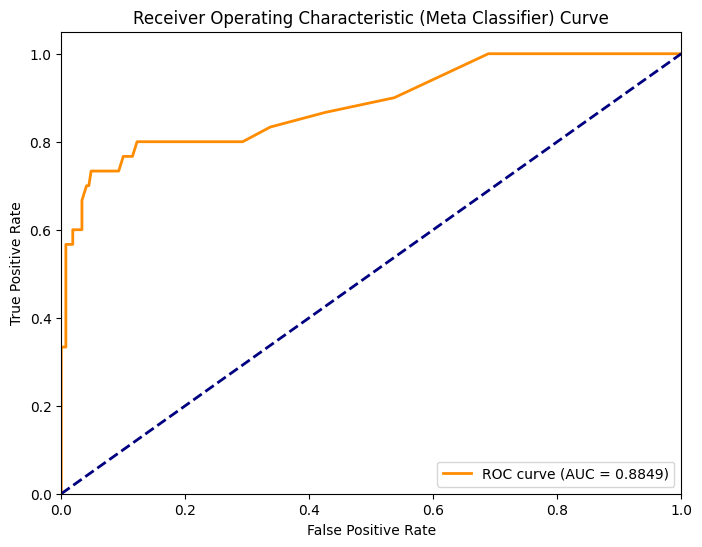

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
# 1. Create a sample imbalanced dataset (use your dataset here)
X_final, Y_final = make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.1], random_state=42)

# 2. Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_final, Y_final, test_size=0.3, random_state=42)

# 3. Train a classifier (Random Forest in this example)
model = meta_classifier
model.fit(X_train, y_train)

# 4. Predict probabilities for the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probability of class 1

# 5. Calculate the AUC score
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc:.4f}")

# 6. Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 7. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Meta Classifier) Curve')
plt.legend(loc="lower right")
plt.show()


# RandomForest

AUC Score: 0.9044


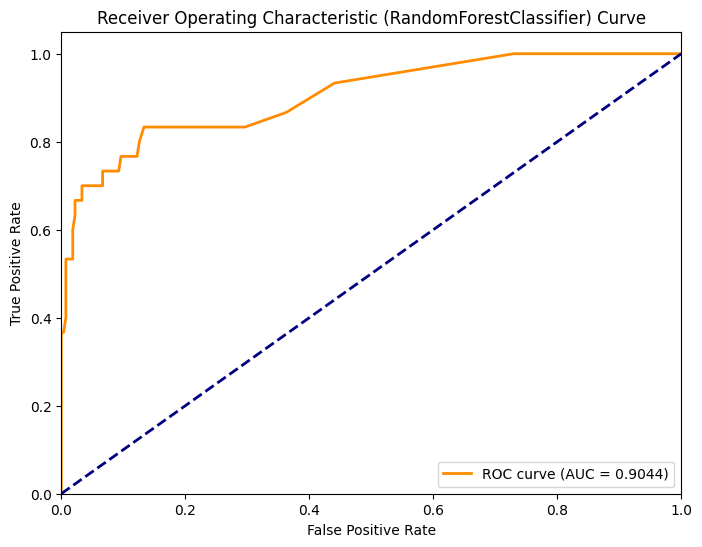

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier


# 1. Create a sample imbalanced dataset (use your dataset here)
X_final, Y_final = make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.1], random_state=42)

# 2. Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_final, Y_final, test_size=0.3, random_state=42)

# 3. Train a classifier (Random Forest in this example)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# 4. Predict probabilities for the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probability of class 1

# 5. Calculate the AUC score
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc:.4f}")

# 6. Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 7. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (RandomForestClassifier) Curve')
plt.legend(loc="lower right")
plt.show()


# KNN

AUC Score: 0.7247


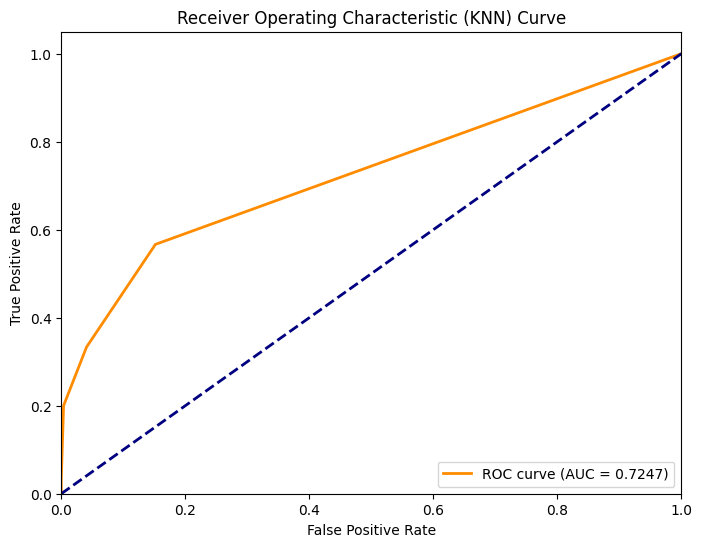

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.naive_bayes import GaussianNB

# 1. Create a sample imbalanced dataset (use your dataset here)
X_final, Y_final = make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.1], random_state=42)

# 2. Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_final, Y_final, test_size=0.3, random_state=42)

# 3. Train a classifier (Random Forest in this example)
model = KNeighborsClassifier() # Assign the existing GaussianNB instance to model.
model.fit(X_train, y_train)

# 4. Predict probabilities for the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probability of class 1

# 5. Calculate the AUC score
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc:.4f}")

# 6. Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 7. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (KNN) Curve')
plt.legend(loc="lower right")
plt.show()


# Naive Bayes

AUC Score: 0.8814


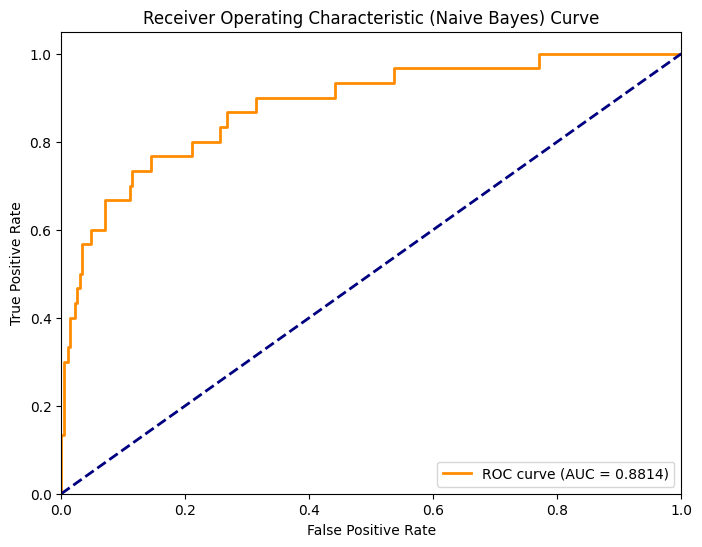

In [ ]:

# 1. Create a sample imbalanced dataset (use your dataset here)
X_final, Y_final = make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.1], random_state=42)

# 2. Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_final, Y_final, test_size=0.3, random_state=42)

# 3. Train a classifier (Random Forest in this example)
model = nbayes # Assign the existing GaussianNB instance to model.
model.fit(X_train, y_train)

# 4. Predict probabilities for the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probability of class 1

# 5. Calculate the AUC score
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc:.4f}")

# 6. Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 7. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Naive Bayes) Curve')
plt.legend(loc="lower right")
plt.show()


# XGB

AUC Score: 0.8827


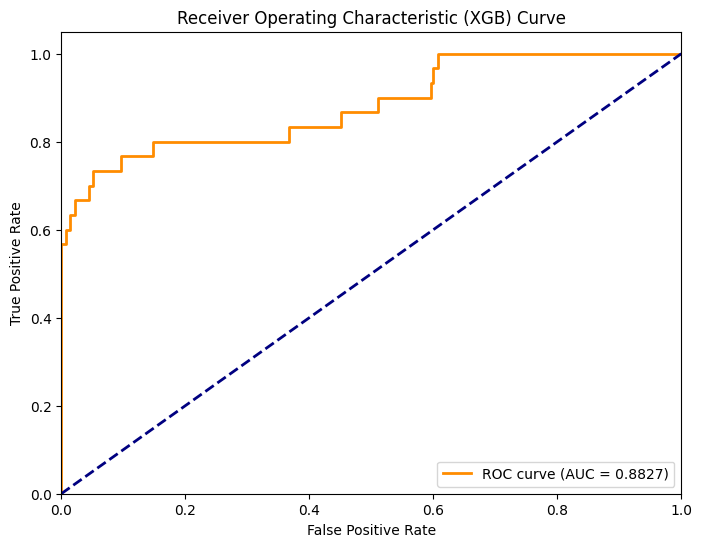

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from xgboost import XGBClassifier

# 1. Create a sample imbalanced dataset (use your dataset here)
X_final, Y_final = make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.1], random_state=42)

# 2. Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_final, Y_final, test_size=0.3, random_state=42)

# 3. Train a classifier (Random Forest in this example)
model = XGBClassifier() # Assign the existing GaussianNB instance to model.
model.fit(X_train, y_train)

# 4. Predict probabilities for the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probability of class 1

# 5. Calculate the AUC score
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc:.4f}")

# 6. Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 7. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (XGB) Curve')
plt.legend(loc="lower right")
plt.show()


# DT classifier

AUC Score: 0.7685


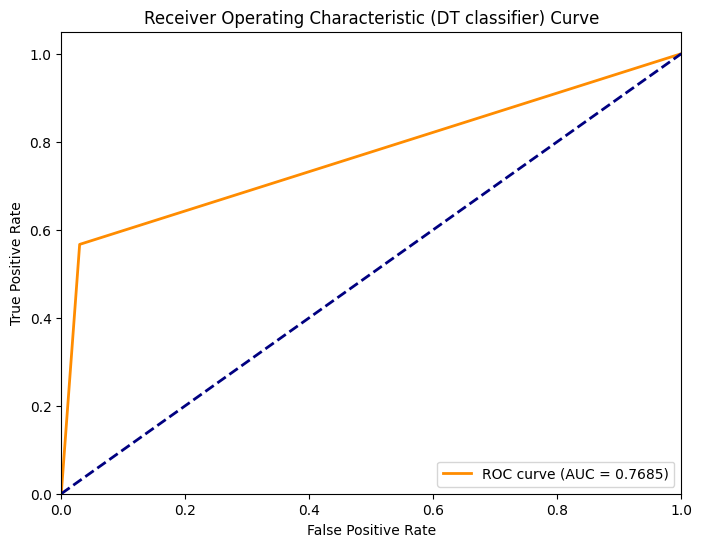

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier

# 1. Create a sample imbalanced dataset (use your dataset here)
X_final, Y_final = make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.1], random_state=42)

# 2. Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_final, Y_final, test_size=0.3, random_state=42)

# 3. Train a classifier (Random Forest in this example)
model = DecisionTreeClassifier() # Assign the existing GaussianNB instance to model.
model.fit(X_train, y_train)

# 4. Predict probabilities for the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probability of class 1

# 5. Calculate the AUC score
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc:.4f}")

# 6. Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 7. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (DT classifier) Curve')
plt.legend(loc="lower right")
plt.show()


# Logistic Regression

AUC Score: 0.8728


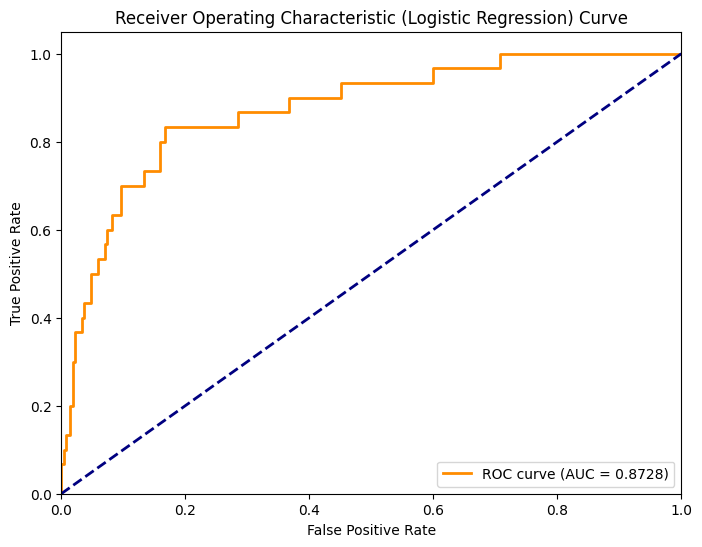

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression

# 1. Create a sample imbalanced dataset (use your dataset here)
X_final, Y_final = make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.1], random_state=42)

# 2. Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_final, Y_final, test_size=0.3, random_state=42)

# 3. Train a classifier (Random Forest in this example)
model = LogisticRegression() # Assign the existing GaussianNB instance to model.
model.fit(X_train, y_train)

# 4. Predict probabilities for the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probability of class 1

# 5. Calculate the AUC score
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc:.4f}")

# 6. Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 7. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Logistic Regression) Curve')
plt.legend(loc="lower right")
plt.show()


# SVC

AUC Score: 0.8731


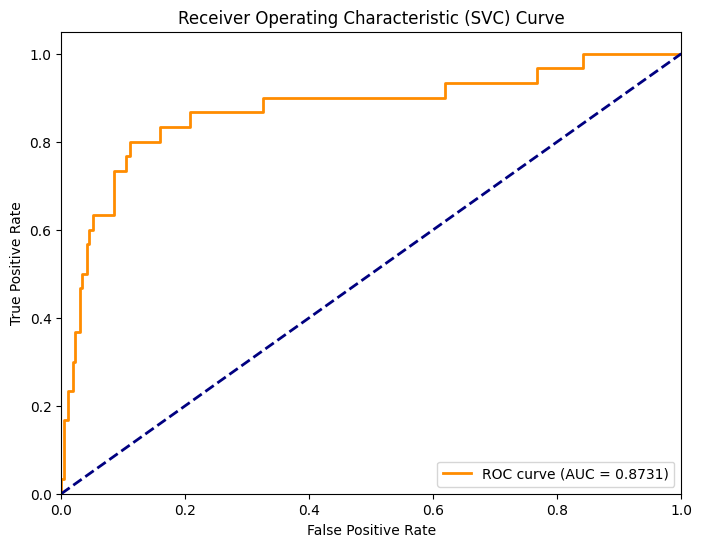

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.svm import SVC

# 1. Create a sample imbalanced dataset (use your dataset here)
X_final, Y_final = make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.1], random_state=42)

# 2. Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_final, Y_final, test_size=0.3, random_state=42)

# 3. Train a classifier (Random Forest in this example)
model = SVC(probability=True) # Assign the existing GaussianNB instance to model and enable probability estimation.
model.fit(X_train, y_train)

# 4. Predict probabilities for the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probability of class 1

# 5. Calculate the AUC score
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc:.4f}")

# 6. Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 7. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (SVC) Curve')
plt.legend(loc="lower right")
plt.show()

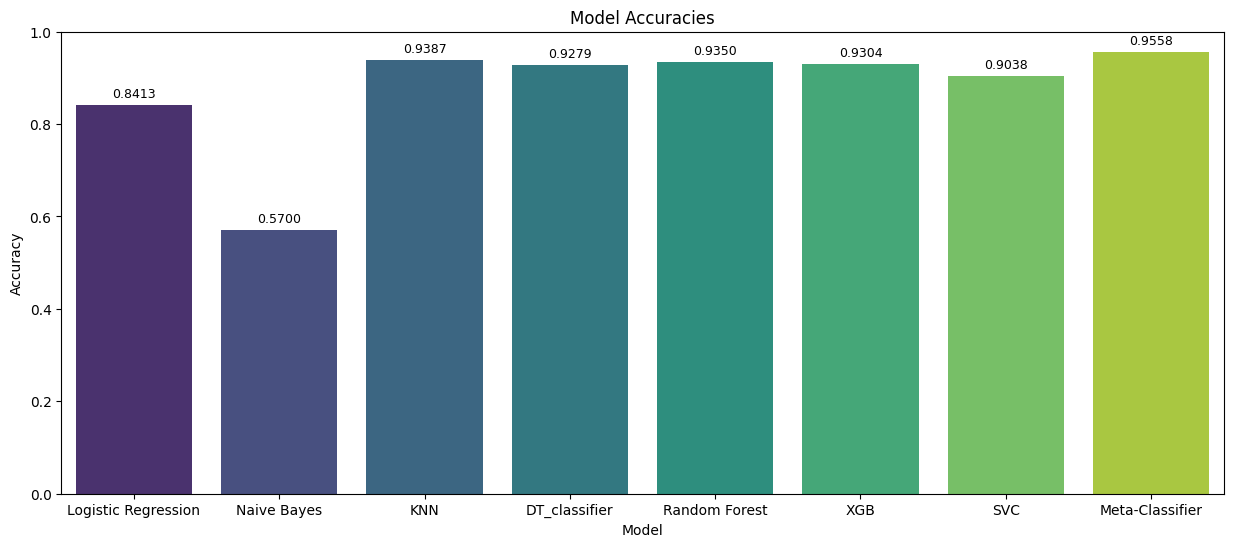

In [ ]:
models = ["Logistic Regression", "Naive Bayes","KNN","DT_classifier","Random Forest","XGB","SVC","Meta-Classifier"]
accuracies = [test_accuracy_log_reg, test_accuracy_nbayes,test_accuracy_knn,test_accuracy_dt_classifier,test_accuracy_random_forest,test_accuracy_xgb,test_accuracy_svc,accuracy_meta]

# Create a bar plot using Seaborn
plt.figure(figsize=(15, 6))
sns.barplot(x=models, y=accuracies, hue=models, palette="viridis", legend=False)
plt.title("Model Accuracies")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy

# Display numeric values on the bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f"{accuracy:.4f}", ha="center", va="bottom", fontsize=9)

plt.show()

In [ ]:
# Calculate F1-score for each model, specifying 'average' parameter
f1_scores = [f1_score(Y_test, X_test_prediction_log_reg, average='weighted'), # or 'micro', 'macro'
             f1_score(Y_test, X_test_prediction_nbayes, average='weighted'),
             f1_score(Y_test, X_test_prediction_knn, average='weighted'),
             f1_score(Y_test, X_test_prediction_dt_classifier, average='weighted'),
             f1_score(Y_test, X_test_prediction_random_forest, average='weighted'),
             f1_score(Y_test, X_test_prediction_xgb, average='weighted'),
             f1_score(Y_test, X_test_prediction_svc, average='weighted'),
             f1_score(Y_test, y_pred_meta, average='weighted')]


# Print F1-scores for each model
for model, f1_score_value in zip(models, f1_scores):
    print(f"{model}: F1-score = {f1_score_value:.4f}")

Logistic Regression: F1-score = 0.8396
Naive Bayes: F1-score = 0.5011
KNN: F1-score = 0.9388
DT_classifier: F1-score = 0.9278
Random Forest: F1-score = 0.9347
XGB: F1-score = 0.9302
SVC: F1-score = 0.9031
Meta-Classifier: F1-score = 0.9558


<ipython-input-178-507a7e2fc1f4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=f1_scores, palette="viridis",legend=False)


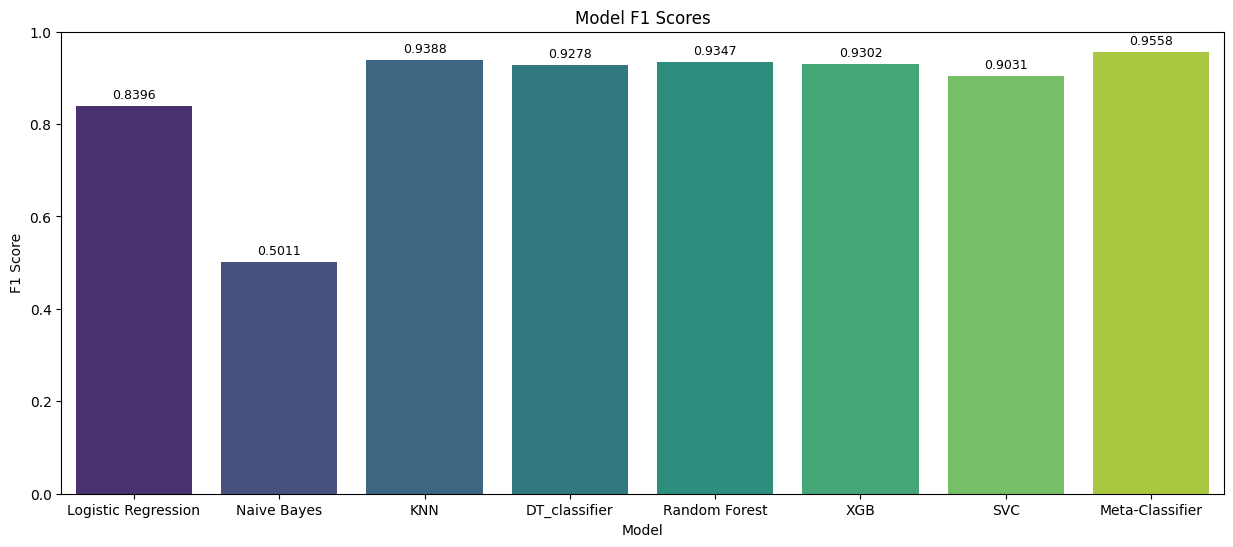

In [ ]:
plt.figure(figsize=(15, 6))
sns.barplot(x=models, y=f1_scores, palette="viridis",legend=False)
plt.title("Model F1 Scores")
plt.xlabel("Model")
plt.ylabel("F1 Score")
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for F1 score

# Display numeric values on the bars for F1 scores
for i, f1 in enumerate(f1_scores):
    plt.text(i, f1 + 0.01, f"{f1:.4f}", ha="center", va="bottom", fontsize=9)

plt.show()

# Precision Recall

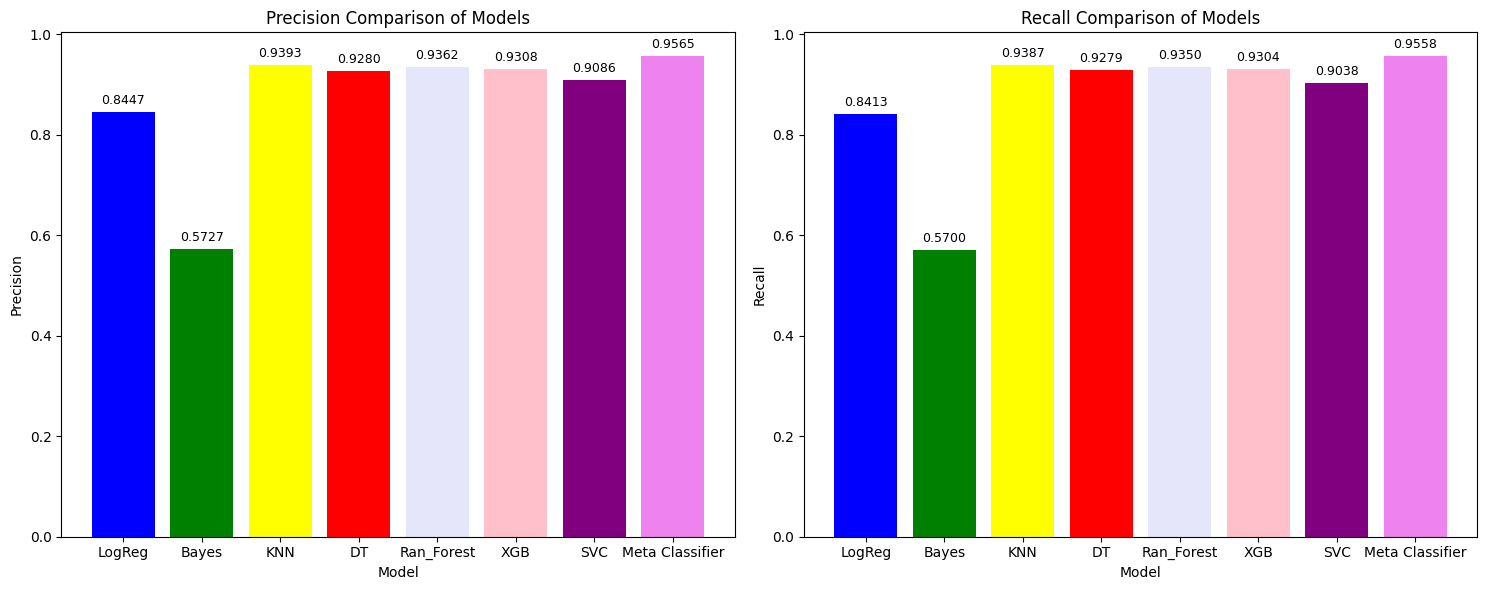

In [ ]:

# Calculate precision and recall for each model, specifying 'average' parameter for multiclass classification
precisions = [precision_score(Y_test,X_test_prediction_log_reg, average='weighted'), # or 'micro', 'macro'
              precision_score(Y_test, X_test_prediction_nbayes, average='weighted'),
              precision_score(Y_test, X_test_prediction_knn, average='weighted'),
              precision_score(Y_test, X_test_prediction_dt_classifier, average='weighted'),
              precision_score(Y_test,X_test_prediction_random_forest, average='weighted'),
              precision_score(Y_test,X_test_prediction_xgb, average='weighted'),
              precision_score(Y_test,X_test_prediction_svc, average='weighted'),
              precision_score(Y_test,y_pred_meta, average='weighted')]

recalls = [recall_score(Y_test, X_test_prediction_log_reg, average='weighted'), # or 'micro', 'macro'
           recall_score(Y_test, X_test_prediction_nbayes, average='weighted'),
           recall_score(Y_test, X_test_prediction_knn, average='weighted'),
           recall_score(Y_test, X_test_prediction_dt_classifier, average='weighted'),
           recall_score(Y_test,X_test_prediction_random_forest, average='weighted'),
           recall_score(Y_test,X_test_prediction_xgb, average='weighted'),
           recall_score(Y_test,X_test_prediction_svc, average='weighted'),
           recall_score(Y_test,y_pred_meta, average='weighted')]
# Define models
models = ["LogReg", "Bayes", "KNN","DT","Ran_Forest","XGB","SVC","Meta Classifier"]

# Plot the bar chart for precision
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.bar(models, precisions, color=["blue", "green", "yellow","red","lavender","pink","purple","violet"])
plt.xlabel('Model')
plt.ylabel('Precision')
plt.title('Precision Comparison of Models')
for i, f1 in enumerate(precisions):
    plt.text(i, f1 + 0.01, f"{f1:.4f}", ha="center", va="bottom", fontsize=9)


# Plot the bar chart for recall
plt.subplot(1, 2, 2)
plt.bar(models, recalls, color=["blue", "green", "yellow","red","lavender","pink","purple","violet"])
plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Recall Comparison of Models')
for i, f1 in enumerate(recalls):
    plt.text(i, f1 + 0.01, f"{f1:.4f}", ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()




# **Confusin Matrix**

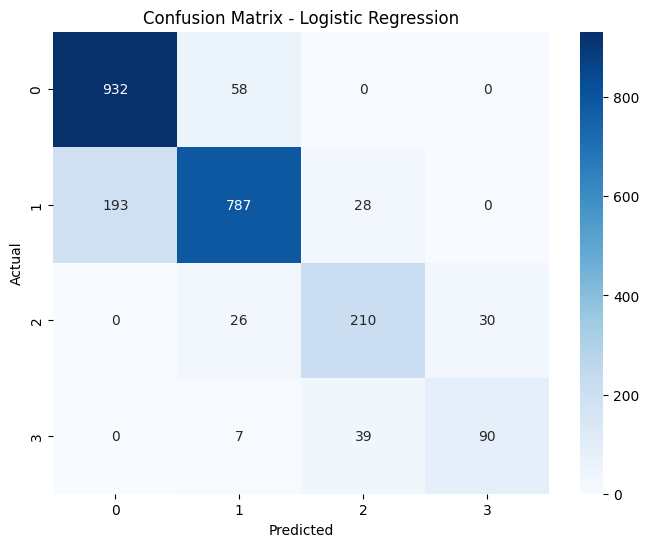

In [ ]:
cm_lr = confusion_matrix(Y_test, X_test_prediction_log_reg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

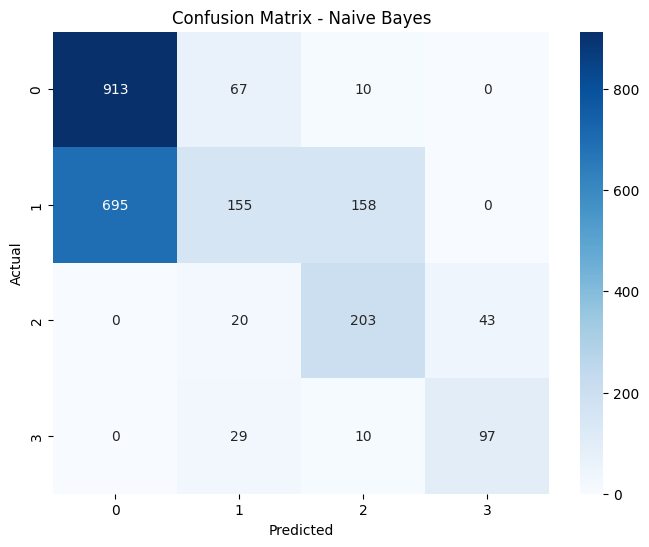

In [ ]:
cm_nb = confusion_matrix(Y_test,X_test_prediction_nbayes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

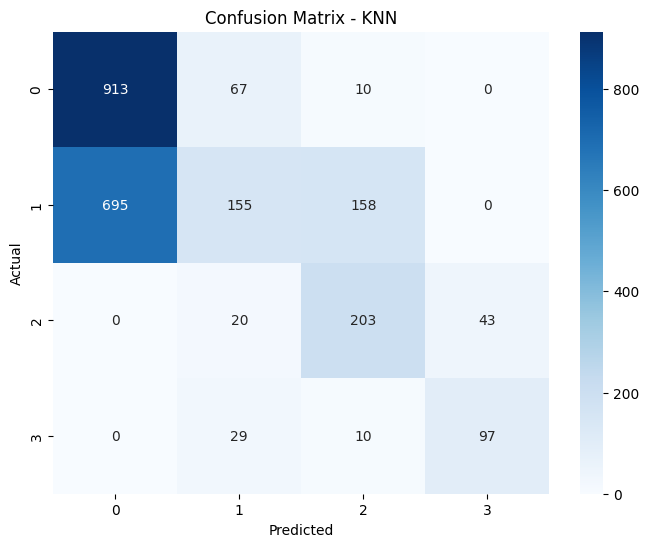

In [ ]:
cm_knn = confusion_matrix(Y_test,X_test_prediction_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

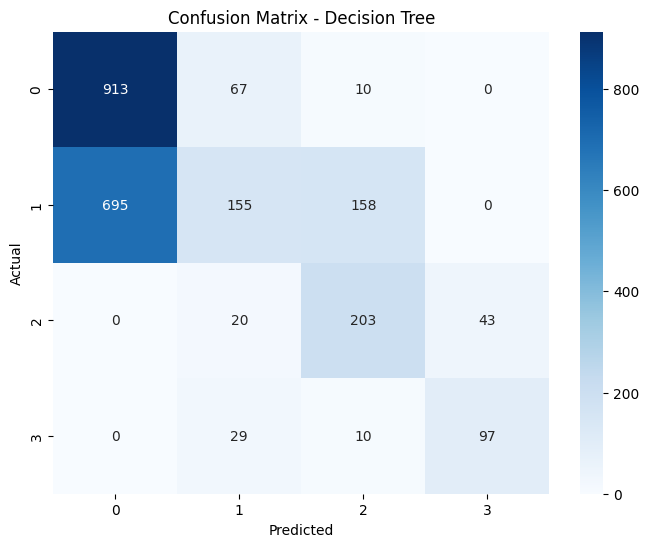

In [ ]:
cm_dt_classifier = confusion_matrix(Y_test,X_test_prediction_dt_classifier)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

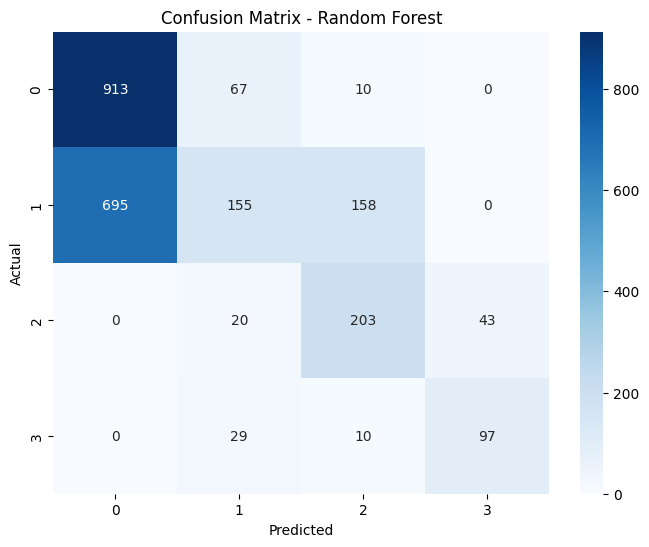

In [ ]:
cm_dt_classifier = confusion_matrix(Y_test,X_test_prediction_random_forest)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

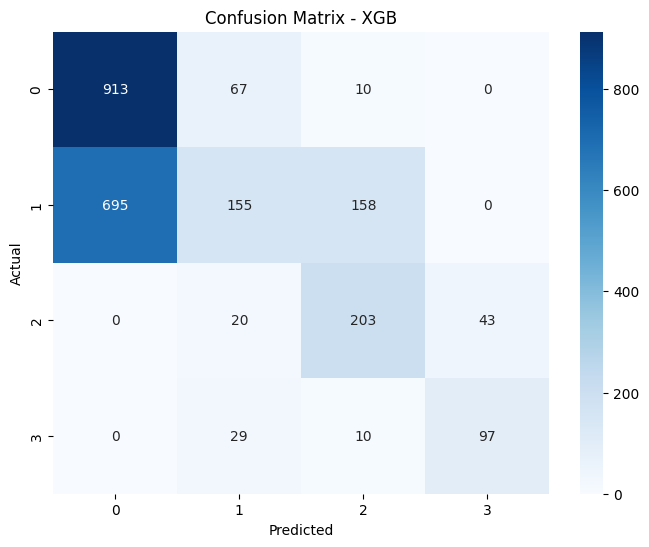

In [ ]:
cm_dt_classifier = confusion_matrix(Y_test,X_test_prediction_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - XGB')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

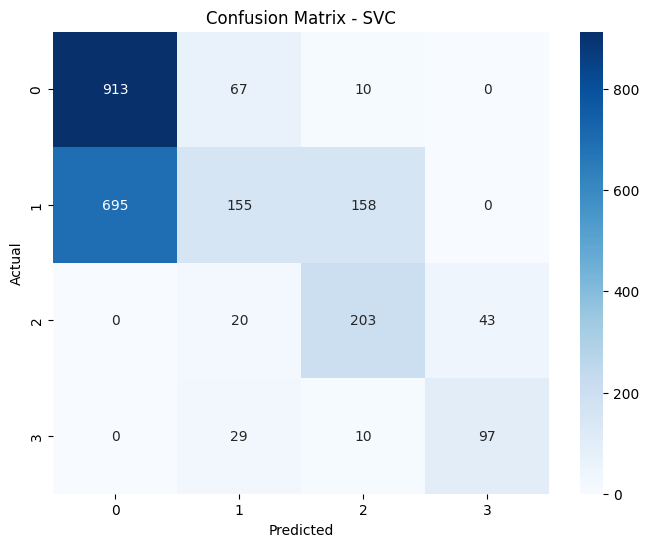

In [ ]:
cm_dt_classifier = confusion_matrix(Y_test,X_test_prediction_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - SVC')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

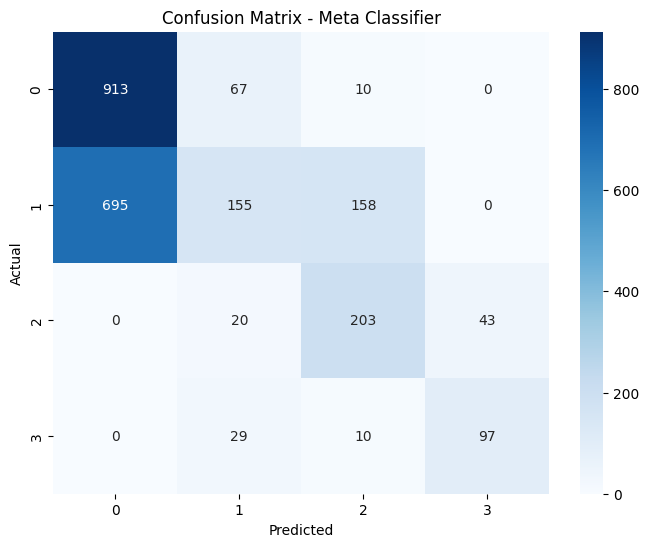

In [ ]:
cm_dt_classifier = confusion_matrix(target, y_pred_meta)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - Meta Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()